## Pregunta 1:
### ¿Existe un incremento en la cantidad de denuncias por violencia intrafamiliar a lo largo de los años? 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('./files/Dataset_Unificado_Proyecto.csv', sep=';', low_memory=False)

Hipótesis: Las denuncias por violencia intrafamiliar han disminuído con el paso de los años.

In [5]:
df["TIPO_EVENTO"].isna().sum()

0

ANO
2009.0      492
2010.0    35154
2011.0    37145
2012.0    35016
2013.0      659
2014.0    33640
2015.0    36788
2016.0    36258
2017.0    35534
2018.0    35365
2019.0     7929
2020.0     4562
2021.0    45655
2022.0    45602
dtype: int64


<Axes: xlabel='ANO'>

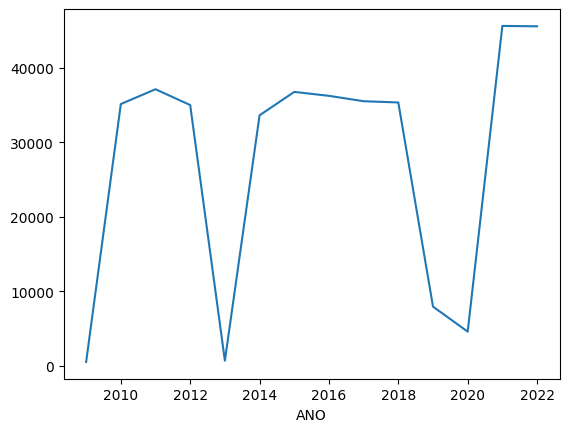

In [6]:
denuncias_por_anio = df.groupby("ANO").size()
print(denuncias_por_anio)

denuncias_por_anio.plot(kind="line")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa61454e390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa61454fc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa616690710>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6145614d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa614562050>],
 'means': []}

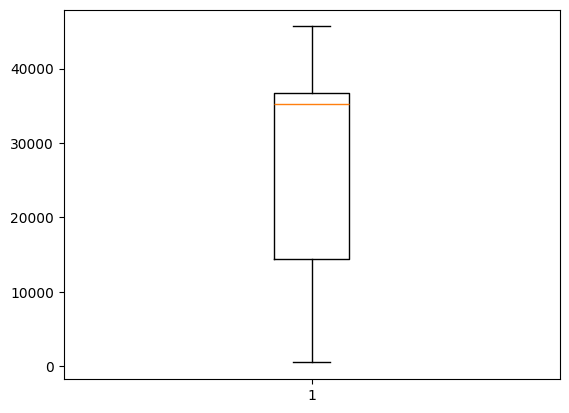

In [7]:
plt.boxplot(denuncias_por_anio)

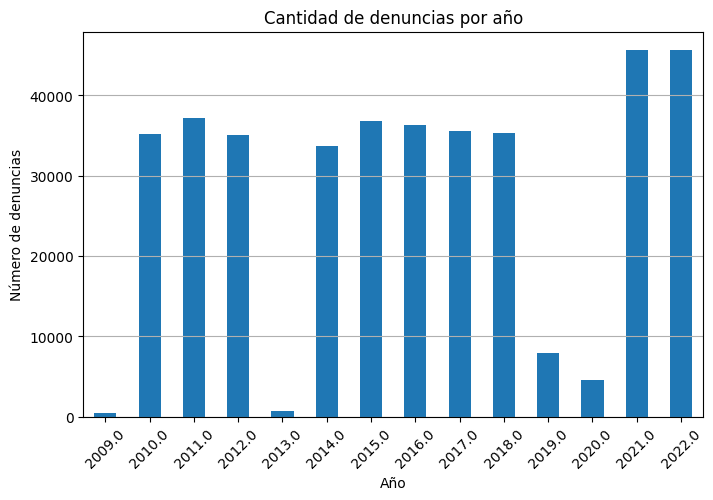

In [8]:
plt.figure(figsize=(8,5))

denuncias_por_anio.plot(kind="bar")

plt.title("Cantidad de denuncias por año")
plt.xlabel("Año")
plt.ylabel("Número de denuncias")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()

In [9]:
denuncias_por_anio = denuncias_por_anio.sort_index()

tasa_crecimiento = denuncias_por_anio.pct_change()
porcentaje = tasa_crecimiento * 100

print(tasa_crecimiento)
print(porcentaje)


ANO
2009.0          NaN
2010.0    70.451220
2011.0     0.056637
2012.0    -0.057316
2013.0    -0.981180
2014.0    50.047041
2015.0     0.093579
2016.0    -0.014407
2017.0    -0.019968
2018.0    -0.004756
2019.0    -0.775795
2020.0    -0.424644
2021.0     9.007672
2022.0    -0.001161
dtype: float64
ANO
2009.0            NaN
2010.0    7045.121951
2011.0       5.663651
2012.0      -5.731592
2013.0     -98.118003
2014.0    5004.704097
2015.0       9.357907
2016.0      -1.440687
2017.0      -1.996801
2018.0      -0.475601
2019.0     -77.579528
2020.0     -42.464371
2021.0     900.767207
2022.0      -0.116088
dtype: float64


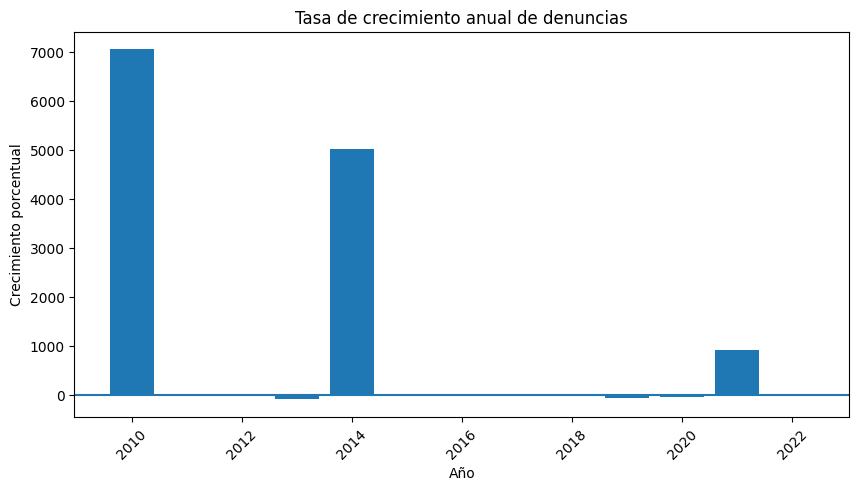

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.bar(porcentaje.index, porcentaje.values)

plt.axhline(0)  # línea base
plt.title("Tasa de crecimiento anual de denuncias")
plt.xlabel("Año")
plt.ylabel("Crecimiento porcentual")
plt.xticks(rotation=45)

plt.show()


In [11]:
crecimiento_promedio = tasa_crecimiento.mean()
print("Crecimiento promedio anual:", crecimiento_promedio)

Crecimiento promedio anual: 9.798224725278786
